# Balistic Deposition
### Mohammad Mahyar Esfahani

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [8]:
def height(col):
    '''Finds the height of the selected column. Ignores if there is cavity in the column.'''
    h = len(col)
    for y in range(h - 1, -1, -1):
        if col[y] == 1:
            return y
    else:
        return 0

In [9]:
def balistic_deopsition(surface, particles):
    '''Runs the Ballistic Deposition algorithm.'''
    l, h = surface.shape
    maxs = []

    for _ in tqdm(range(particles), desc='ballistic deposition progress'):
        # choose a position to place the particle randomly
        r = int(np.random.uniform(0, l))

        # find the heights of neighbouring columns
        h_m1 = height(surface[(r - 1)%l, :])
        h0 = height(surface[r, :])
        h_1 = height(surface[(r + 1)%l, :])

        # find the max height between the neighbours
        maxx = max(h_m1, h0, h_1)

        # choose where to place the particle
        if maxx < h:
            if surface[r,maxx] == 1:
                surface[r, maxx + 1] = 1
                continue
            elif maxx == -1:
                surface[r, 0] = 1
                continue
            else:
                surface[r, maxx] = 1

        # Collect information about the heights for each step in order to calulate the roughness
        max_i = []
        for i in range(1, l - 1):
            max_i.append([i, height(surface[i, :])])
        maxs.append(max_i)
        

    maxs = np.array(maxs)

    return surface, maxs

In [10]:
def find_filled_positions(surface):
    '''Finds all the filled positions of the surface.'''
    filled_positions = []
    for row_idx, row in enumerate(surface):
        for col_idx, value in enumerate(row):
            if value == 1:
                filled_positions.append([row_idx, col_idx])
    return np.array(filled_positions)

In [11]:
def plot_BD(l=100, h=250, particles=10000, mid_bar=False, bar_height=50):
    '''Shows the surface using Ballistic Deposition.'''
    
    # set the figure size
    figure_size=(6, 12)
    
    surface = np.zeros([l, h])

    if mid_bar:
        # If mid_bar is True, create a bar of particles in the middle
        surface[l // 2, :bar_height] = 1

    # Run the Ballistic Deposition algorithm
    surface, maxs = balistic_deopsition(surface, particles)
    
    
    # Plot the standard deviation of heights over time
    wt = [np.std(i, axis=0)[1] for i in maxs]
    plt.plot(wt);
    plt.xlabel('t')
    plt.ylabel('roughness')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid()
    plt.tight_layout()
    plt.figure(figsize=figure_size)
    plt.show()

    # Plot the location of particles
    plt.figure(figsize=figure_size)
    XY = find_filled_positions(surface)
    plt.plot(XY[:, 0], XY[:, 1], 's', markersize=2);
    plt.xlim([0, l])
    plt.ylim([0, h])
    plt.gca().set_aspect('equal')
    plt.grid()
    plt.show()

In [12]:
def plot_w(maxs):
    wt = [np.std(i, axis=0)[1] for i in maxs]
    plt.plot(wt);
    plt.xlabel('t')
    plt.ylabel('roughness')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid()
    plt.tight_layout()
    figure_size=(10, 6)
    plt.figure(figsize=figure_size)
    plt.show()

In [13]:
def plot_particles(surface):
    l,h = np.shape(surface)
    figure_size=(6, 10)
    plt.figure(figsize=figure_size)
    XY = find_filled_positions(surface)
    plt.plot(XY[:, 0], XY[:, 1], 's', markersize=2);
    plt.xlim([0, l])
    plt.ylim([0, h])
    plt.gca().set_aspect('equal')
    plt.grid()
    plt.show()

## For l = 100

In [14]:
particles100 = 10**4
l100, h100 = 100, 220
surface100 = np.zeros([l100, h100])
surface100, maxs100 = balistic_deopsition(surface100, particles100)

ballistic deposition progress: 100%|███████████████████████████████████████████| 10000/10000 [00:07<00:00, 1259.95it/s]


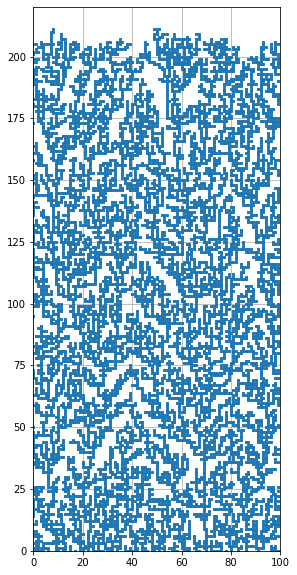

In [15]:
plot_particles(surface100)

## for l = 200

In [16]:
particles200 = 4*10**4
l200, h200 = 200, 480
surface200 = np.zeros([l200, h200])
surface200, maxs200 = balistic_deopsition(surface200, particles200)

ballistic deposition progress: 100%|████████████████████████████████████████████| 40000/40000 [02:47<00:00, 238.86it/s]


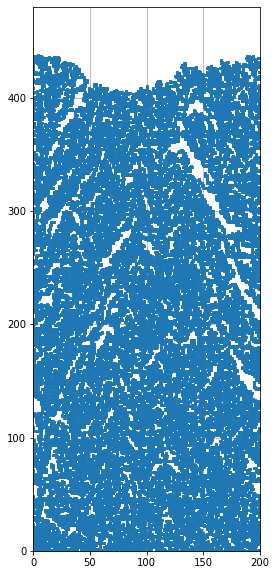

In [17]:
plot_particles(surface200)

## for l = 400

In [18]:
particles400 = 10**5
l400, h400 = 400, 590
surface400 = np.zeros([l400, h400])
surface400, maxs400 = balistic_deopsition(surface400, particles400)

ballistic deposition progress: 100%|██████████████████████████████████████████| 100000/100000 [15:49<00:00, 105.28it/s]


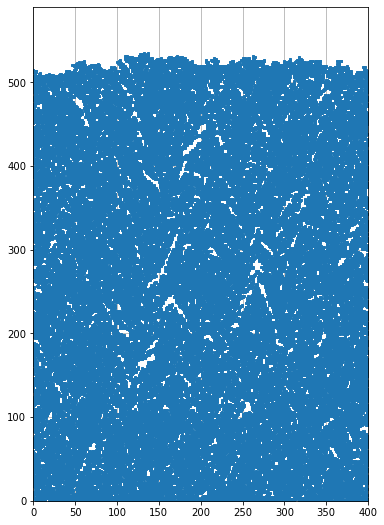

In [19]:
plot_particles(surface400)

In [21]:
wt100 = [np.std(i, axis=0)[1] for i in maxs100]
wt200 = [np.std(i, axis=0)[1] for i in maxs200]
wt400 = [np.std(i, axis=0)[1] for i in maxs400]

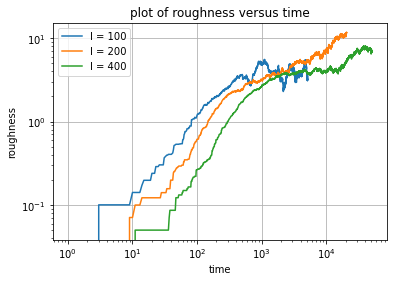

In [23]:
plt.plot(wt100, label='l = 100')
plt.plot(wt200, label='l = 200')
plt.plot(wt400, label='l = 400')
# plt.plot(wt800, label='l = 800')
plt.xlabel('time')
plt.ylabel('roughness')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('plot of roughness versus time')
plt.grid()
plt.show()